<a href="https://colab.research.google.com/github/nadhimmna/Tugas-Machine-Learning/blob/main/Tugas%20Minggu%202/2_Logistic_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Muhammad Nadhim Abdirrahman
NIM : 1103210018
Kelas : TK4505
Dataset : train.csv

Akurasi model: 81.01%


<ipython-input-12-8ce371f96ae0>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette=['red', 'green'])


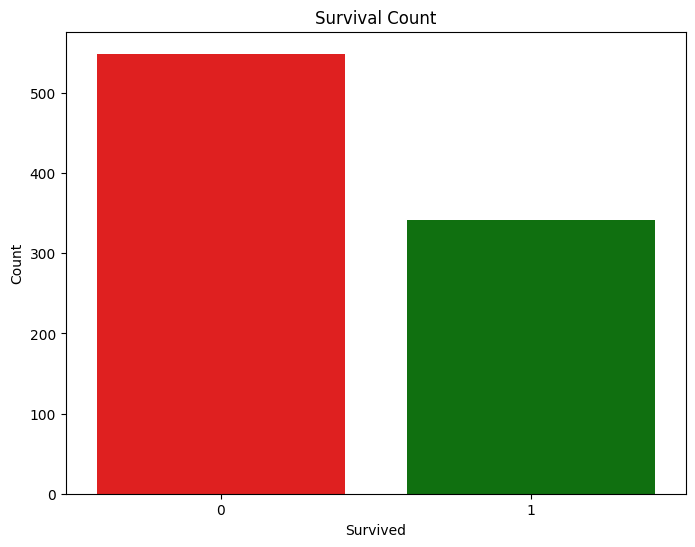

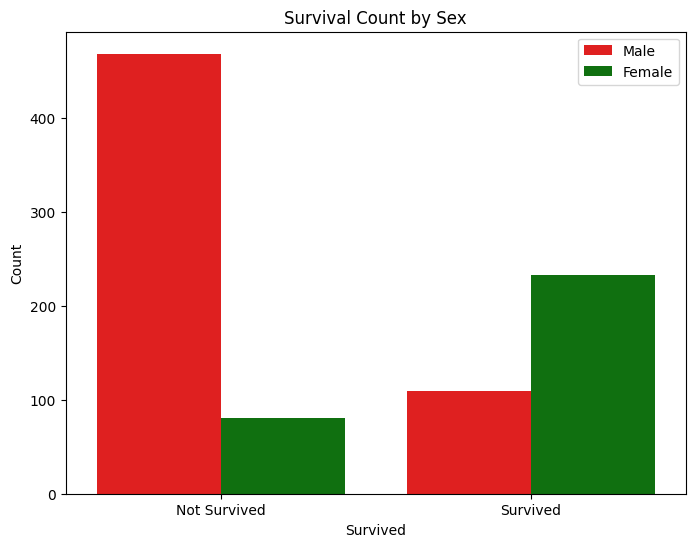

In [ ]:
# Impor library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Baca data dari file CSV
url = "/content/drive/MyDrive/Machine Learning/train.csv"
data = pd.read_csv(url)

# Menghapus kolom yang tidak relevan atau memiliki banyak nilai yang hilang
data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Mengisi nilai yang hilang dengan nilai rata-rata pada kolom 'Age'
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Memeriksa kolom yang tersedia dalam dataset
if 'Sex' in data.columns:
    # Mengubah data kategorikal menjadi data numerik dengan one-hot encoding
    data = pd.get_dummies(data, columns=['Sex'])

    # Memisahkan fitur dan label
    X = data.drop('Survived', axis=1)
    y = data['Survived']

    # Membagi dataset menjadi data latih dan data uji
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Membuat objek model
    model = LogisticRegression()

    # Melatih model pada data latih
    model.fit(X_train, y_train)

    # Memprediksi kelas pada data uji
    y_pred = model.predict(X_test)

    # Menghitung akurasi model
    accuracy = accuracy_score(y_test, y_pred)
    print("Akurasi model: {:.2f}%".format(accuracy * 100))

    # Menampilkan grafik penumpang yang selamat dan tidak selamat
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Survived', data=data, palette=['red', 'green'])
    plt.title('Survival Count')
    plt.xlabel('Survived')
    plt.ylabel('Count')
    plt.show()

    # Menampilkan grafik penumpang yang selamat dan tidak selamat berdasarkan jenis kelamin
    if 'Sex_female' in data.columns and 'Sex_male' in data.columns:
        plt.figure(figsize=(8, 6))
        sns.countplot(x='Survived', hue='Sex_female', data=data, palette=['red', 'green'])
        plt.title('Survival Count by Sex')
        plt.xlabel('Survived')
        plt.ylabel('Count')
        plt.xticks([0, 1], ['Not Survived', 'Survived'])
        plt.legend(['Male', 'Female'])
        plt.show()
    else:
        print("Kolom 'Sex_female' atau 'Sex_male' tidak ditemukan dalam dataset.")
else:
    print("Kolom 'Sex' tidak ditemukan dalam dataset.")
